In [1]:
import sys
sys.path.append('./')
import torch
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns

In [74]:
i = 912

Text(0.5, 1.0, '912.mat')

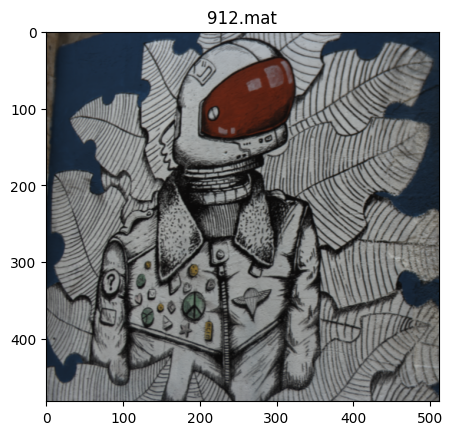

In [75]:
root = '/work3/s212645/Spectral_Reconstruction/clean/ARAD/'
name = str(i).zfill(3) + '.mat'
mat = scipy.io.loadmat(f'{root}{name}')
rgb = mat['rgb']
ycrcb = mat['ycrcb']
plt.imshow(rgb)
plt.title(name)

In [80]:
Y, Cr, Cb = cv.split(ycrcb)

hh, ww = ycrcb.shape[:2]
# Fill Y and Cb with 128 (Y level is middle gray, and Cb is "neutralized").
gray = np.full((hh,ww), 128, dtype=np.uint8)

# invert Cr and Cb
Cr_inv = cv.bitwise_not(Cr)
Cb_inv = cv.bitwise_not(Cb)

# combine channels to get the Cr and Cb colorized images as if BGR
Cr_colored = cv.merge([gray, Cr_inv, Cr])
Cb_colored = cv.merge([Cb, Cb_inv, gray])
Y_colored = cv.merge([Y, Y, Y])

# save results
cv.imwrite('Y.png', Y_colored)
cv.imwrite('Cr.png', Cr_colored)
cv.imwrite('Cb.png', Cb_colored)


True

In [104]:
def no_white_pad(path, name):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    print(img.shape)
    for i in range(img.shape[0]):
        if img[i,200,:].mean() != 255:
            h_min = i
            break
    for i in reversed(range(img.shape[0])):
        if img[i,200,:].mean() != 255:
            h_max = i
            break
    for i in range(img.shape[1]):
        if img[200,i,:].mean() != 255:
            w_min = i
            break
    for i in reversed(range(500)):
        if img[200,i,:].mean() != 255:
            w_max = i
            break
    # plt.imshow(img[h_min:h_max,w_min:w_max,:])
    # plt.axis('off')
    # plt.savefig(name, bbox_inches='tight', pad_inches=0)
    # plt.close()
    return img[h_min:h_max,w_min:w_max,:]
    

In [124]:
mrae = []
deltae = []
sam = []

path = 'heatmap/MSTPlusPlus/ARAD-3-mrae.png'
name = 'figures/MSTPlusPlus-ARAD-3-mrae.png'
mrae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-3-deltaE.png'
name = 'figures/MSTPlusPlus-ARAD-3-deltaE.png'
deltae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-3-sam.png'
name = 'figures/MSTPlusPlus-ARAD-3-sam.png'
sam.append(no_white_pad(path, name))

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [125]:
path = 'heatmap/MSTPlusPlus/ARAD-9-DELTAE.png'
name = 'figures/MSTPlusPlus-ARAD-9-DELTAE.png'
mrae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-9-deltaE.png'
name = 'figures/MSTPlusPlus-ARAD-9-deltaE.png'
deltae.append(no_white_pad(path, name))
path = 'heatmap/MSTPlusPlus/ARAD-9-sam.png'
name = 'figures/MSTPlusPlus-ARAD-9-sam.png'
sam.append(no_white_pad(path, name))

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [126]:
path = 'heatmap/Restormer/ARAD-18-mrae.png'
name = 'figures/Restormer-ARAD-18-mrae.png'
mrae.append(no_white_pad(path, name))
path = 'heatmap/Restormer/ARAD-18-deltaE.png'
name = 'figures/Restormer-ARAD-18-deltaE.png'
deltae.append(no_white_pad(path, name))
path = 'heatmap/Restormer/ARAD-18-sam.png'
name = 'figures/Restormer-ARAD-18-sam.png'
sam.append(no_white_pad(path, name))

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


In [127]:
mraes = cv.vconcat(mrae)
plt.imshow(mraes)
plt.axis('off')
plt.title('MST++')
plt.savefig('figures/MSTPlusPlus-MRAE', bbox_inches='tight', pad_inches=0)
plt.close()

In [128]:
deltaes = cv.vconcat(deltae)
plt.imshow(deltaes)
plt.axis('off')
plt.title('MST++')
plt.savefig('figures/MSTPlusPlus-DELTAE', bbox_inches='tight', pad_inches=0)
plt.close()

In [129]:
sams = cv.vconcat(sam)
plt.imshow(sams)
plt.axis('off')
plt.title('MST++')
plt.savefig('figures/MSTPlusPlus-SAM', bbox_inches='tight', pad_inches=0)
plt.close()

In [131]:
gt = []
gt.append(no_white_pad('ARAD-test-GT/ARAD-test-GT/ARAD-3-gt.png', '_'))
gt.append(no_white_pad('ARAD-test-GT/ARAD-test-GT/ARAD-9-gt.png', '_'))
gt.append(no_white_pad('ARAD-test-GT/ARAD-test-GT/ARAD-18-gt.png', '_'))
gts = cv.vconcat(gt)
plt.imshow(gts)
plt.axis('off')
plt.title('RGB')
plt.savefig('figures/GT-RGB', bbox_inches='tight', pad_inches=0)
plt.close()

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


(-0.5, 913.5, 390.5, -0.5)

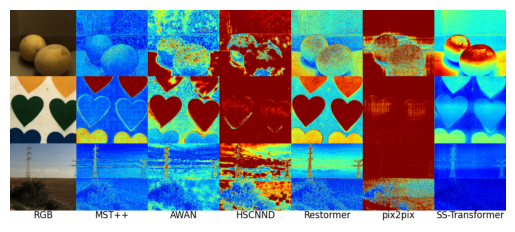

In [236]:
gt = []
gt.append(cv.cvtColor(cv.imread('figures/GT-RGB.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/MSTPlusPlus-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/AWAN-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/HSCNN_Plus-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/Restormer-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/pix2pix-DELTAE.png'), cv.COLOR_BGR2RGB))
gt.append(cv.cvtColor(cv.imread('figures/SSTransformer-DELTAE.png'), cv.COLOR_BGR2RGB))
gts = cv.hconcat(gt)
gts = cv.vconcat([gts[21:, :, :], gts[:21, :, :]])
plt.imshow(gts)
plt.axis('off')
# plt.imshow(gts)
# plt.axis('off')
# plt.savefig('figures/SAM', bbox_inches='tight', pad_inches=0)
# plt.close()

In [237]:
bar = cv.cvtColor(cv.imread('heatmap/AWAN/ARAD-0-deltaE.png'), cv.COLOR_BGR2RGB)
# bar = cv.cvtColor(bar, cv.COLOR_BGR2RGB)
for i in range(bar.shape[0]):
    if bar[i,200,:].mean() != 255:
        h_min = i - 11
        break
for i in reversed(range(bar.shape[0])):
    if bar[i,200,:].mean() != 255:
        h_max = i + 12
        break
for i in range(bar.shape[1]):
    if bar[200,i + 500,:].mean() != 255:
        w_min = i + 490
        break
for i in reversed(range(bar.shape[1])):
    if bar[200,i,:].mean() != 255:
        w_max = i + 50
        break
bar = bar[h_min:h_max,w_min:w_max,:]

In [238]:
top, bottom, left, right = 10, 0, 0, 0
white = [255, 255, 255]
padded_img = cv.copyMakeBorder(gts, top, bottom, left, right, cv.BORDER_CONSTANT, value=white)
padded_bar = cv.copyMakeBorder(bar, bottom, top, left, right, cv.BORDER_CONSTANT, value=white)
gts = cv.hconcat([padded_img, padded_bar])
cv.imwrite('figures/DELTAE.png', cv.cvtColor(gts, cv.COLOR_RGB2BGR))
# plt.imshow(gts)
# plt.axis('off')
# plt.savefig('figures/SAM', bbox_inches='tight', pad_inches=0)
# plt.close()

True

In [2]:
import pandas as pd

/tmp/ipykernel_538535/2314722944.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='MRAE', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/2314722944.py:31: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='MRAE', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/2314722944.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/2314722944.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


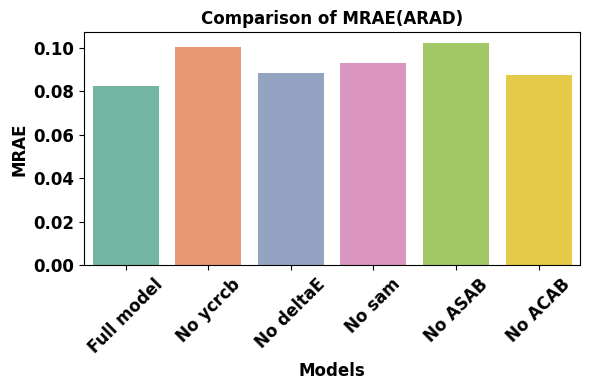

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 准备数据
data = {
    'Models': ['Full model', 'No ycrcb', 'No deltaE', 'No sam', 'No ASAB', 'No ACAB'],
    # 'Dataset': ['ARAD'] * 6 + ['BGU'] * 6 + ['CAVE'] * 6,
    'MRAE': [0.08247689, 0.10005851, 0.08825938, 0.09284412, 0.10187545, 0.08741664,
            #  0.39775358, 0.43435625, 0.37844962, 0.52639109, 0.39210377, 0.38908046,
            #  1.13162937, 0.73828230, 0.93538543, 1.07238929, 1.07711834, 1.14705281
             ],
    'RMSE': [0.01173700, 0.01640207, 0.01455436, 0.01341754, 0.01369194, 0.01328422,
            #  0.03873436, 0.04435592, 0.03775252, 0.10087954, 0.04063509, 0.04153588,
            #  0.03052282, 0.04287333, 0.03010138, 0.03796605, 0.03172768, 0.03812279
             ],
    'PSNR': [40.85047433, 38.57149998, 39.26994664, 39.77843430, 39.57633744, 39.94371180,
            #  28.30633893, 27.27368353, 28.72323099, 22.02248227, 27.95165320, 27.84452066,
            #  30.99037411, 28.10205939, 31.08510790, 29.26804334, 31.10083410, 29.09811856
             ],
    'SAM': [0.06724409, 0.07694217, 0.07214666, 0.07450518, 0.07824624, 0.07500295,
            # 0.17315973, 0.18055134, 0.16269046, 0.23926654, 0.19119814, 0.22261507,
            # 0.37906502, 0.39841689, 0.38014720, 0.38497507, 0.39097300, 0.41150482
            ]
}

df = pd.DataFrame(data)

# 绘制条形图
plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='MRAE', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of MRAE(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('MRAE', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)
# plt.legend(title='Dataset')

# 显示图形
plt.tight_layout()
plt.show()

/tmp/ipykernel_538535/3221080079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='RMSE', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/3221080079.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='RMSE', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/3221080079.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/3221080079.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


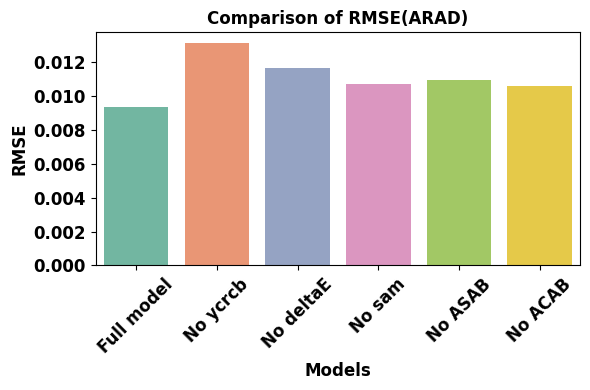

In [13]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='RMSE', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of RMSE(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('RMSE', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()

/tmp/ipykernel_538535/600930431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='PSNR', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/600930431.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='PSNR', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/600930431.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/600930431.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


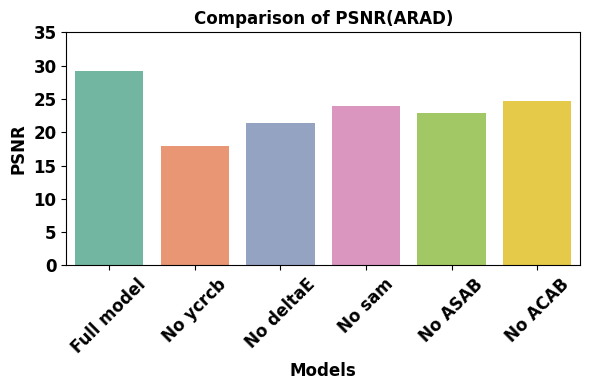

In [14]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='PSNR', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of PSNR(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('PSNR', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)
plt.ylim(35, 42)
# 显示图形
plt.tight_layout()
plt.show()

/tmp/ipykernel_538535/3703771579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='SAM', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/3703771579.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='SAM', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/3703771579.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/3703771579.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


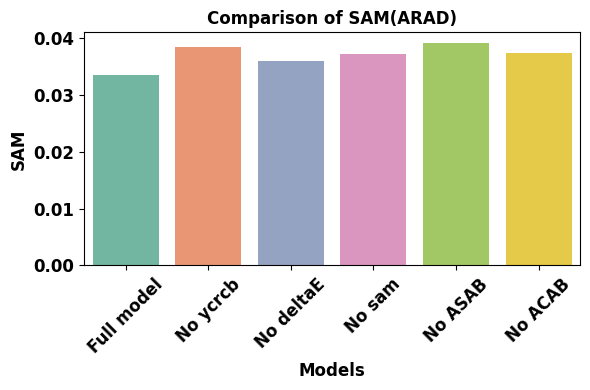

In [15]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='SAM', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of SAM(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('SAM', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()

/tmp/ipykernel_538535/4172196610.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='MRAERGB', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/4172196610.py:30: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='MRAERGB', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/4172196610.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/4172196610.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


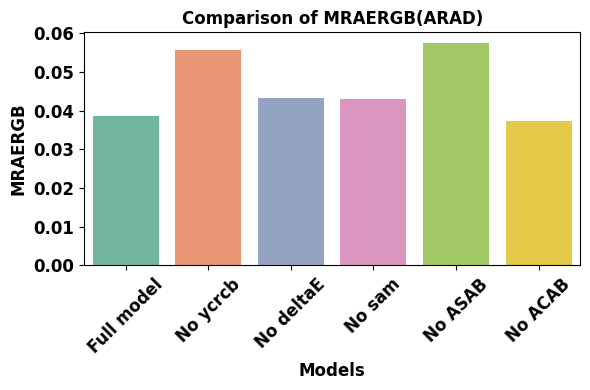

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 准备数据
data = {
    'Models': ['Full model', 'No ycrcb', 'No deltaE', 'No sam', 'No ASAB', 'No ACAB'],
    'MRAERGB': [0.03859517, 0.05566618, 0.04338484, 0.04316115, 0.05741252, 0.03726072,
                # 0.39818989, 0.43426688, 0.37000521, 0.54742510, 0.39735323, 0.36596415,
                # 0.34928229, 0.21720479, 0.25276298, 0.31261017, 0.31706241, 0.35087286
                ],
    'SSIM': [0.99729561, 0.99531752, 0.99576324, 0.99663735, 0.99558794, 0.99744031,
            #  0.81131072, 0.78490445, 0.82174230, 0.67748455, 0.81543784, 0.83608173,
            #  0.97003772, 0.97170317, 0.97841628, 0.96965298, 0.97185554, 0.96819936
             ],
    'PSNRRGB': [50.60434464, 45.43118859, 45.81174652, 49.10295204, 46.83999652, 49.88655685,
                # 24.68296403, 23.59827558, 26.08880315, 20.77640265, 24.61329094, 25.72527558,
                # 42.31645561, 30.94014469, 40.36767458, 36.36144838, 42.61271450, 41.11252015
                ],
    'Delta E': [0.24579763, 0.52025676, 0.40446878, 0.29101051, 0.35815800, 0.27946590,
                # 2.08019882, 2.49049769, 1.85464704, 7.01225760, 2.14207677, 1.90819330,
                # 0.45173132, 1.73800738, 0.61035264, 1.00811381, 0.48528314, 0.54248175
                ]
}

df = pd.DataFrame(data)

# 绘制条形图
plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='MRAERGB', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of MRAERGB(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('MRAERGB', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12) 
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()

/tmp/ipykernel_538535/112100054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='SSIM', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/112100054.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='SSIM', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/112100054.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/112100054.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


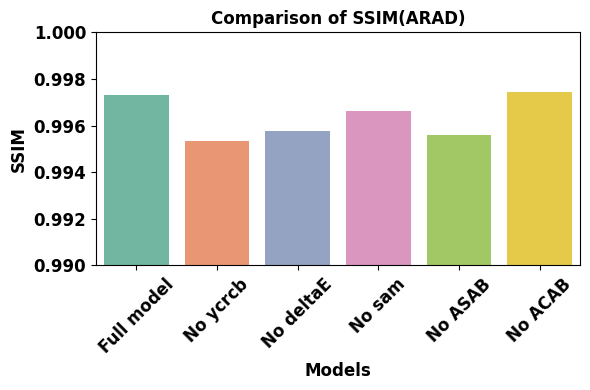

In [17]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='SSIM', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of SSIM(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('SSIM', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0.99, 1.0)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12) 
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()

/tmp/ipykernel_538535/194774850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='PSNRRGB', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/194774850.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='PSNRRGB', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/194774850.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/194774850.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


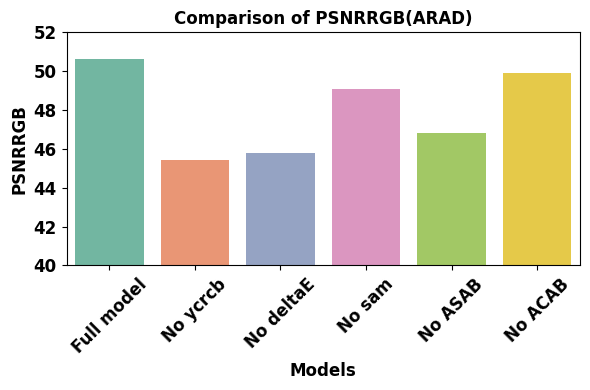

In [20]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='PSNRRGB', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of PSNRRGB(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('PSNRRGB', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(40, 52)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12) 
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()

/tmp/ipykernel_538535/2349385358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='Delta E', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/2349385358.py:2: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='Models', y='Delta E', data=df, palette=sns.color_palette("Set2"))
/tmp/ipykernel_538535/2349385358.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12)
/tmp/ipykernel_538535/2349385358.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)


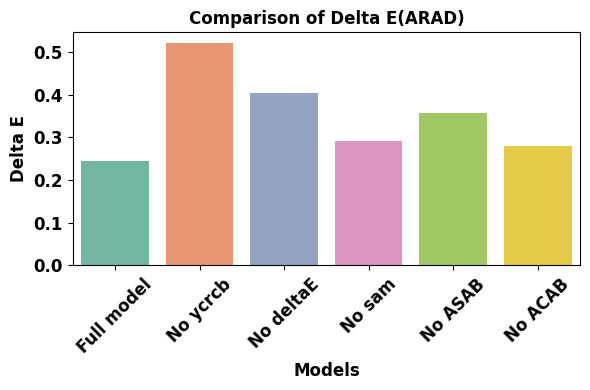

In [19]:

plt.figure(figsize=(6, 4))
sns.barplot(x='Models', y='Delta E', data=df, palette=sns.color_palette("Set2"))

# 添加标题和标签
plt.title('Comparison of Delta E(ARAD)', fontweight='bold', fontsize=12)
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Delta E', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), fontweight='bold', fontsize=12) 
plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontweight='bold', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()